# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

Alumno: Hector Rafael Alvarez Aceves
Matrícula: A01632621

# Importing libraries

In [39]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [40]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [12]:
print(dataset.shape)

dataset.head()


(150, 5)


,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [41]:
dataset = dataset.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [42]:
# Encoding the categorical column
dataset = dataset.replace({"Especie":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [43]:
# Drop out non necesary columns
dataset.drop(['LargoSepalo', 'AnchoSepalo'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,LargoPetalo,AnchoPetalo,Especie
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

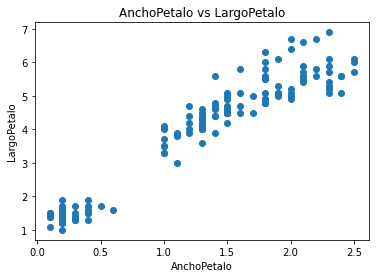

In [44]:
plt.scatter(dataset.AnchoPetalo,dataset.LargoPetalo)
plt.title('AnchoPetalo vs LargoPetalo')
plt.xlabel('AnchoPetalo')
plt.ylabel('LargoPetalo')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-45-0635d08ad5ab>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Iris-setosa')
<ipython-input-45-0635d08ad5ab>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Iris-versicolor')
<ipython-input-45-0635d08ad5ab>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Iris-virginica')


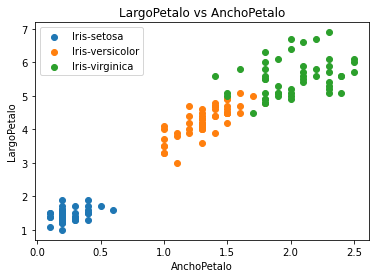

In [45]:
df0 = dataset[dataset.Especie==0]
df1 = dataset[dataset.Especie==1]
df2 = dataset[dataset.Especie==2]

plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Iris-setosa')
plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Iris-versicolor')
plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Iris-virginica')

plt.title('LargoPetalo vs AnchoPetalo')
plt.xlabel('AnchoPetalo')
plt.ylabel('LargoPetalo')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [46]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['AnchoPetalo','LargoPetalo']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

# Visualize the dataset
dataset

,LargoPetalo,AnchoPetalo,Especie,Cluster1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [49]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([0, 2, 1])

In [50]:
# Center of each cluster
km.cluster_centers_

array([[0.246     , 1.462     ],
       [2.0375    , 5.59583333],
       [1.34230769, 4.26923077]])

In [51]:
# Sum of squared error
km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-52-d955af10253d>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
<ipython-input-52-d955af10253d>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
<ipython-input-52-d955af10253d>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')


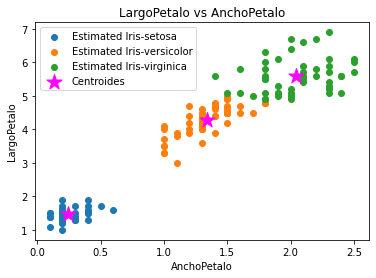

In [52]:
df0 = dataset[dataset.Cluster1==0]
df1 = dataset[dataset.Cluster1==2]
df2 = dataset[dataset.Cluster1==1]

plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('LargoPetalo vs AnchoPetalo')
plt.xlabel('AnchoPetalo')
plt.ylabel('LargoPetalo')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-53-0635d08ad5ab>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Iris-setosa')
<ipython-input-53-0635d08ad5ab>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Iris-versicolor')
<ipython-input-53-0635d08ad5ab>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Iris-virginica')


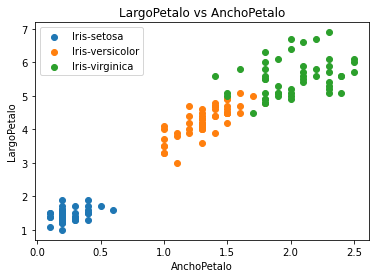

In [53]:
df0 = dataset[dataset.Especie==0]
df1 = dataset[dataset.Especie==1]
df2 = dataset[dataset.Especie==2]

plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Iris-setosa')
plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Iris-versicolor')
plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Iris-virginica')

plt.title('LargoPetalo vs AnchoPetalo')
plt.xlabel('AnchoPetalo')
plt.ylabel('LargoPetalo')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [56]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['AnchoPetalo','LargoPetalo']])
    sse.append(km.inertia_)

C:\Users\hecra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


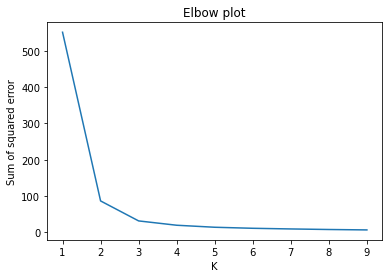

In [57]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean  - Also, compute and show the elbow plot

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

In [80]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

dataset = dataset.dropna()

# Encoding the categorical column
dataset = dataset.replace({"Especie":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

# Drop out non necesary columns
dataset.drop(['LargoSepalo', 'AnchoSepalo'],axis='columns',inplace=True)

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['AnchoPetalo','LargoPetalo']])

# Print estimated cluster of each point in the dataser
yp



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp



In [82]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()


array([1, 2, 0])

In [83]:
# Center of each cluster
km.cluster_centers_


array([[2.0375    , 5.59583333],
       [0.246     , 1.462     ],
       [1.34230769, 4.26923077]])

In [84]:
# Sum of squared error
km.inertia_

31.371358974358966

<ipython-input-85-9c4bc85c3bd6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
<ipython-input-85-9c4bc85c3bd6>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
<ipython-input-85-9c4bc85c3bd6>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')


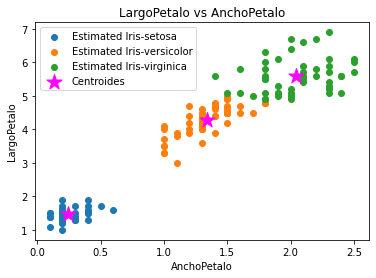

In [85]:
df0 = dataset[dataset.Cluster1==1]
df1 = dataset[dataset.Cluster1==2]
df2 = dataset[dataset.Cluster1==0]

plt.scatter(df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
plt.scatter(df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
plt.scatter(df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('LargoPetalo vs AnchoPetalo')
plt.xlabel('AnchoPetalo')
plt.ylabel('LargoPetalo')
plt.legend()
plt.show()

In [86]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['AnchoPetalo','LargoPetalo']])
    sse.append(km.inertia_)

C:\Users\hecra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


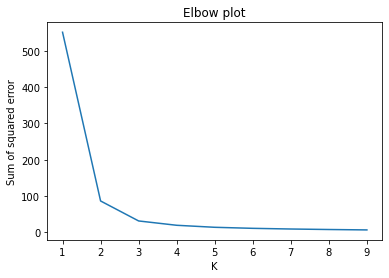

In [87]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.

In [88]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

dataset = dataset.dropna()

# Encoding the categorical column
dataset = dataset.replace({"Especie":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

# Drop out non necesary columns
dataset.drop(['LargoPetalo', 'AnchoPetalo'],axis='columns',inplace=True)

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['AnchoSepalo','LargoSepalo']])


# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [89]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp


In [90]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([1, 0, 2])

In [91]:
# Center of each cluster
km.cluster_centers_

array([[3.07446809, 6.81276596],
       [3.428     , 5.006     ],
       [2.69245283, 5.77358491]])

In [92]:
# Sum of squared error
km.inertia_

37.0507021276596

<ipython-input-93-ce69e2155ca2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoSepalo, df0.LargoSepalo, Label='Estimated Iris-setosa')
<ipython-input-93-ce69e2155ca2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoSepalo, df1.LargoSepalo, Label='Estimated Iris-versicolor')
<ipython-input-93-ce69e2155ca2>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoSepalo, df2.LargoSepalo, Label='Estimated Iris-virginica')


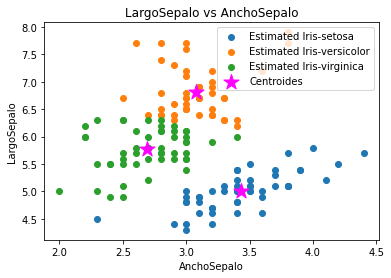

In [93]:
df0 = dataset[dataset.Cluster1==1]
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==2]

plt.scatter(df0.AnchoSepalo, df0.LargoSepalo, Label='Estimated Iris-setosa')
plt.scatter(df1.AnchoSepalo, df1.LargoSepalo, Label='Estimated Iris-versicolor')
plt.scatter(df2.AnchoSepalo, df2.LargoSepalo, Label='Estimated Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('LargoSepalo vs AnchoSepalo')
plt.xlabel('AnchoSepalo')
plt.ylabel('LargoSepalo')
plt.legend()
plt.show()

In [94]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['AnchoSepalo','LargoSepalo']])
    sse.append(km.inertia_)

C:\Users\hecra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


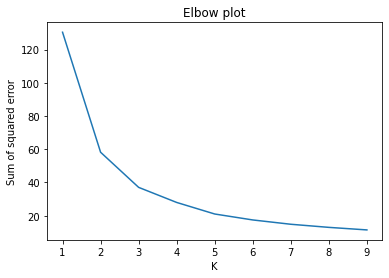

In [95]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible

In [96]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

dataset = dataset.dropna()

# Encoding the categorical column
dataset = dataset.replace({"Especie":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['AnchoSepalo','LargoSepalo','AnchoPetalo','LargoPetalo']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [97]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

In [98]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([0, 1, 2])

In [99]:
# Center of each cluster
km.cluster_centers_

array([[3.428     , 5.006     , 0.246     , 1.462     ],
       [2.7483871 , 5.9016129 , 1.43387097, 4.39354839],
       [3.07368421, 6.85      , 2.07105263, 5.74210526]])

In [100]:
# Sum of squared error
km.inertia_

78.851441426146

<ipython-input-101-48add7983fa2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.AnchoSepalo, df0.LargoSepalo, df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
<ipython-input-101-48add7983fa2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.AnchoSepalo, df1.LargoSepalo, df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
<ipython-input-101-48add7983fa2>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.AnchoSepalo, df2.LargoSepalo, df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')


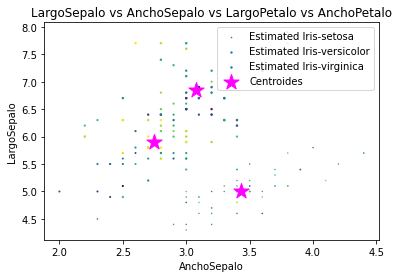

In [101]:
df0 = dataset[dataset.Cluster1==0]
df1 = dataset[dataset.Cluster1==1]
df2 = dataset[dataset.Cluster1==2]

plt.scatter(df0.AnchoSepalo, df0.LargoSepalo, df0.AnchoPetalo, df0.LargoPetalo, Label='Estimated Iris-setosa')
plt.scatter(df1.AnchoSepalo, df1.LargoSepalo, df1.AnchoPetalo, df1.LargoPetalo, Label='Estimated Iris-versicolor')
plt.scatter(df2.AnchoSepalo, df2.LargoSepalo, df2.AnchoPetalo, df2.LargoPetalo, Label='Estimated Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('LargoSepalo vs AnchoSepalo vs LargoPetalo vs AnchoPetalo')
plt.xlabel('AnchoSepalo')
plt.ylabel('LargoSepalo')
plt.legend()
plt.show()

En la gráfica anterior hizo falta representar al ancho y largo de los petalos por lo que es correcto que no se pueden hacer scatter plots de más de una variable dependiente (LargoSepalo) y una variable independiente (AnchoSepalo).

In [102]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['AnchoSepalo','LargoSepalo','AnchoPetalo','LargoPetalo']])
    sse.append(km.inertia_)

C:\Users\hecra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


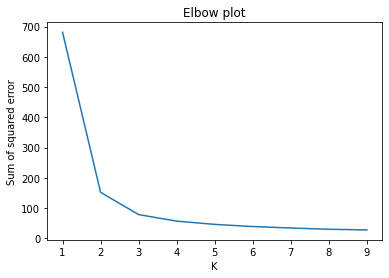

In [103]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

5. Draw conclusiones:
    - About the elbow plot: does the K agree with the real number of clusters? Si, ya que el valor de K en 3 sigue estando en el límite del codo de la gráfica
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why? La mejor es las caracteristicas de los petalos ya que cada cluster tiene sus datos bien agrupados, mientras que en las características de los sepalos se tienen los datos de cada cluster estan más dispersos, por último con las características de los petalos y sepalos son los peores debido a que ni siquiera se pudo graficar completamente todos los datos, además de que aquí se contemplan los datos de los sepalos por lo que en teoría tendría estos datos que tienen clusters con datos dispersos.